# Plotting covid data for US
  Robert Martin
  June, 22, 2020

In [169]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format ='retina'  #. this will give quality plots
plt.style.use('ggplot')

## To get covid data:  Google "Johns Hopkins Corona Virus data github"

In [170]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"

In [171]:
data = pd.read_csv(url) # read the data into a pandas dataframe

## Look at some data

In [172]:
data.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,5,5,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,2,2,2,2,2,2,2,2,2,2
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,146,147,147,147,147,147,147,147,149,149
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,6,6,6,6,6,6,6,6,6,6


In [173]:
# We extract the column data starting at March 1,2020
data_m = data.loc[:,'3/1/20':]

In [174]:
# total the deaths for each day (column)
deaths = data_m.sum() 

In [175]:
deaths[:7] # notice deaths is a pandas series giving the cumulative deaths

3/1/20     1
3/2/20     6
3/3/20     7
3/4/20    11
3/5/20    12
3/6/20    14
3/7/20    17
dtype: int64

In [176]:
# to get the deaths for each day we do a first difference
daily = np.diff(deaths)
daily = np.insert(daily,0,1) # fix March 1
daily[:10] # We interpret below to say 5 deaths occured on March 2

array([1, 5, 1, 4, 1, 2, 3, 4, 1, 6])

<BarContainer object of 114 artists>

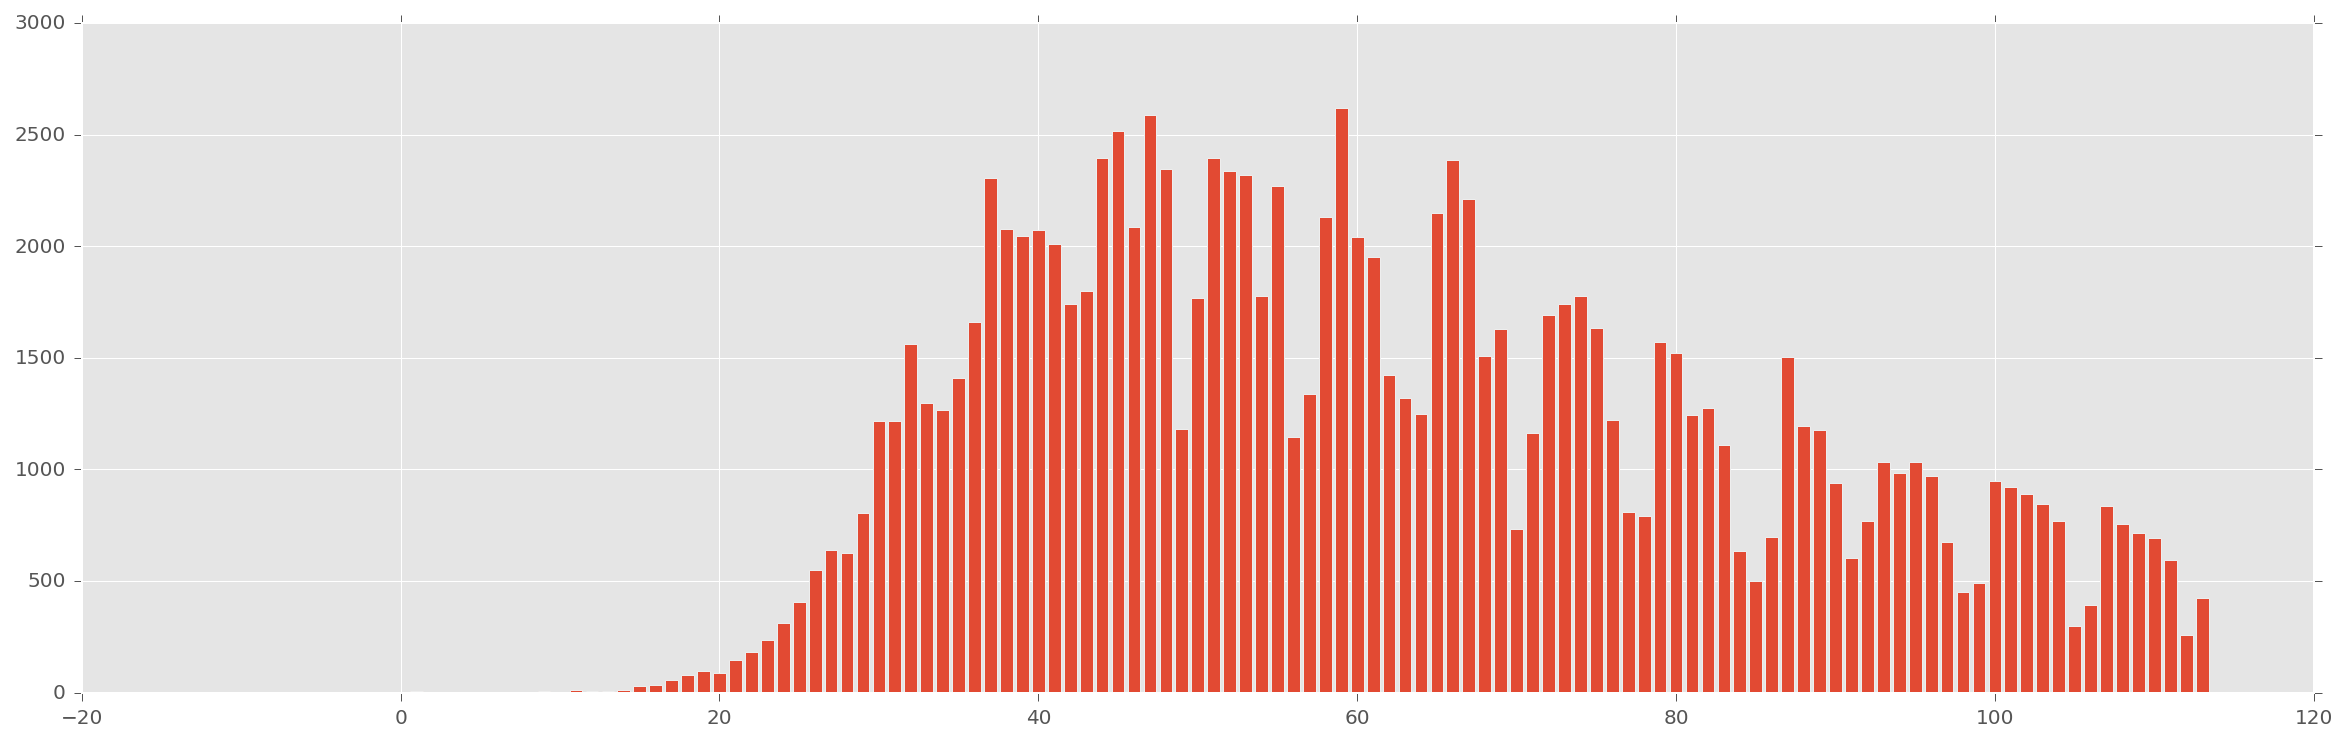

In [177]:
# plot the data
x = np.arange(len(daily))
plt.figure(figsize=(20,6))
plt.bar(x,daily)

In [178]:
# Find 7 day moving aveage
w = 1/7 * np.ones(7)
mov_avg = np.convolve(daily,w,'valid')

In [179]:
(len(daily),len(mov_avg))

(114, 108)

In [180]:
#pad some zeros
mov_avg = np.hstack((np.zeros(6),mov_avg))

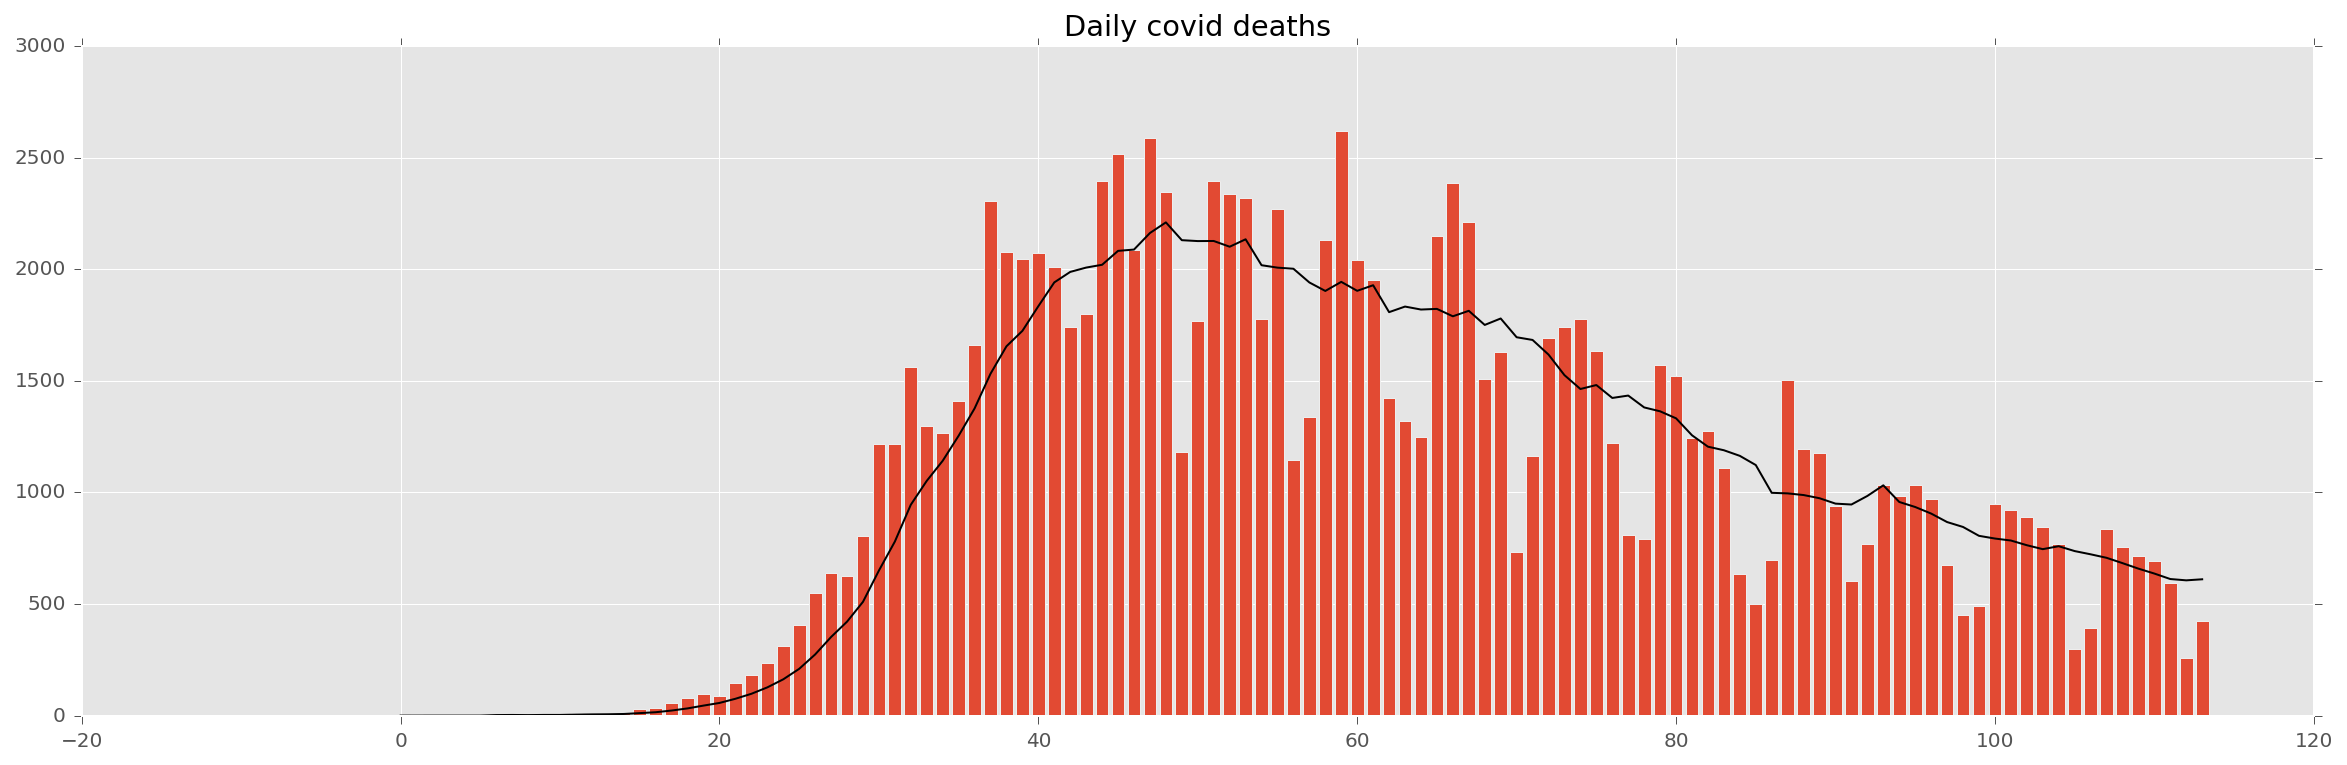

In [182]:
# plot the data with moving average
x = np.arange(len(daily))
plt.figure(figsize=(20,6))
plt.bar(x,daily)
plt.plot(mov_avg,c='k')
plt.title("Daily covid deaths");

## Make a new dataframe with two columns showing cumulative and daily deaths

In [183]:
df = pd.DataFrame({"cumulative" : deaths.values,"daily":daily},index = deaths.index)
df[:15].T

,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
cumulative,1,6,7,11,12,14,17,21,22,28,32,43,52,59,72
daily,1,5,1,4,1,2,3,4,1,6,4,11,9,7,13


## Now we want the x-axis to dispay dates

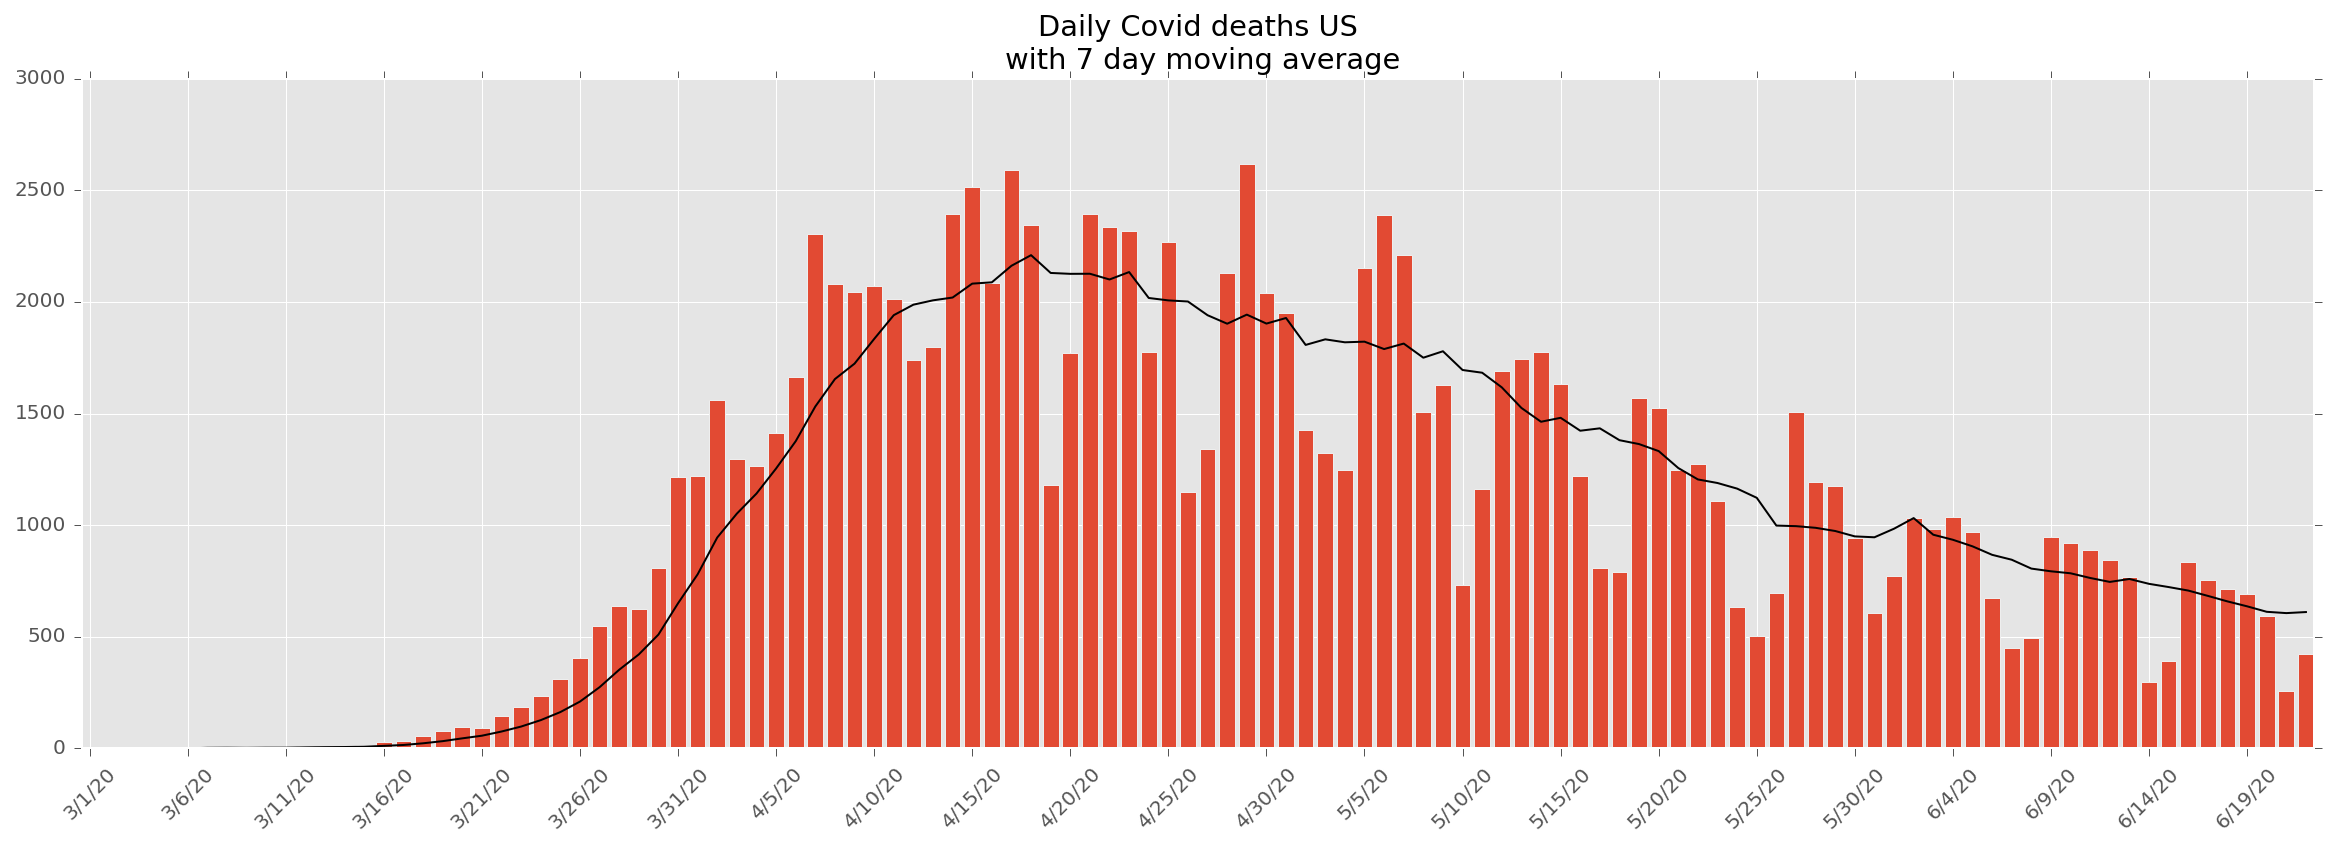

In [190]:

plt.figure(figsize=(20,6))
plt.bar(df.index,df['daily'])
plt.plot(mov_avg,c = 'k')
loc,labels = plt.xticks()
plt.xticks(np.arange(len(mov_avg))[::5],rotation=45);
plt.title('Daily Covid deaths US\n with 7 day moving average');
plt.savefig('covid.png')


In [188]:
plt.savefig('covid.png')

<Figure size 432x288 with 0 Axes>

In [191]:
import os

os.system('jupyter nbconvert --to html covid.ipynb')

0

In [192]:
ls

Pandas_Cheat_Sheet.pdf   covid.html               legs
Python Machine Learning/ covid.ipynb              nnets-deep-learning/
Untitled.ipynb           covid.png                notebooks/
__pycache__/             data/                    regex-cheatsheet.pdf
code/                    image_hist.py            snippets.txt
conda-cheatsheet.pdf     images/                  vstools/
